In [3]:
from GP_class import GaussianProcessRegressor
import jax.numpy as jnp
from jax import jacrev, lax, random, tree_map, vmap,jit
import gp

In [4]:
X = jnp.arange(-5, 5, 0.2).reshape(-1, 1)
X_train = jnp.arange(-3, 4, 1).reshape(-1, 1)
# X_train = jnp.arange(-5, 5, 0.4).reshape(-1, 1)
def f(x):
    return jnp.cos(x)
Y_train = vmap(f)(*X_train.T)
print(X_train.shape)
# default is non-noise:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, Y_train)


(7, 1)


use own fucntion to optimize

In [5]:
num_steps = 40
lr = 0.01
gpr.optim_jax(num_steps, lr, method='SGD')
print(gpr.l,gpr.sigma_f)

0.86660886 0.86850196


use scipy minimize to optimize

In [6]:
res = gpr.optim_np()
print(res)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 7.808191299438477
        x: [ 8.666e-01  8.685e-01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00]
     nfev: 3
     njev: 1
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


0.8666088581085205 0.8685019612312317


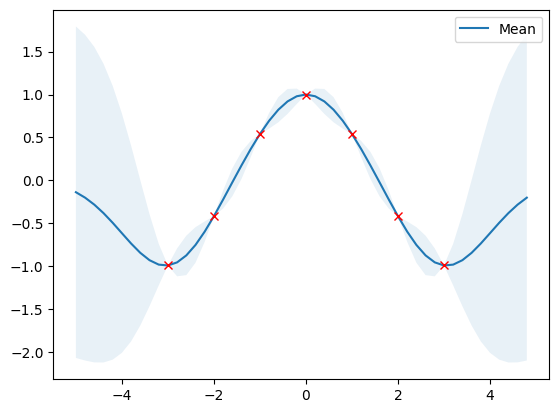

In [7]:
print(gpr.l,gpr.sigma_f)
mu_s, cov_s = gpr.predict(X,return_cov=True)
gp.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

with noise:

In [8]:
noise = 0.4
X_train = jnp.arange(-3, 4, 1).reshape(-1, 1)
Y_train = jnp.sin(X_train) + noise * random.normal(random.PRNGKey(0), X_train.shape)
Y_train = Y_train.ravel()
print(X_train.shape, Y_train.shape)

(7, 1) (7,)


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 9.212126731872559
        x: [ 1.000e+00  1.000e+00]
      nit: 0
      jac: [ 0.000e+00  0.000e+00]
     nfev: 3
     njev: 1
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
1.0 1.0


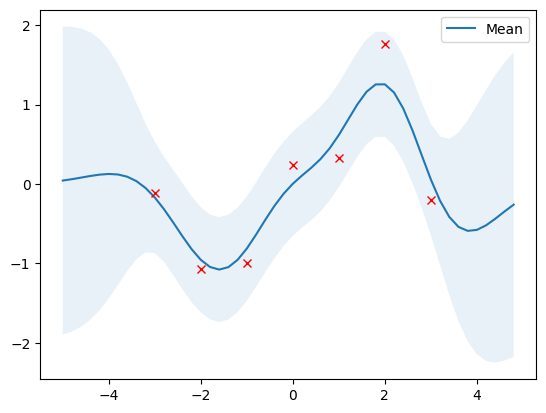

In [9]:
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_train, Y_train)
res = gpr.optim_np()
print(res)
print(gpr.l,gpr.sigma_f)
mu_s, cov_s = gpr.predict(X,return_cov=True)
gp.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

-0.15037867 0.79581577


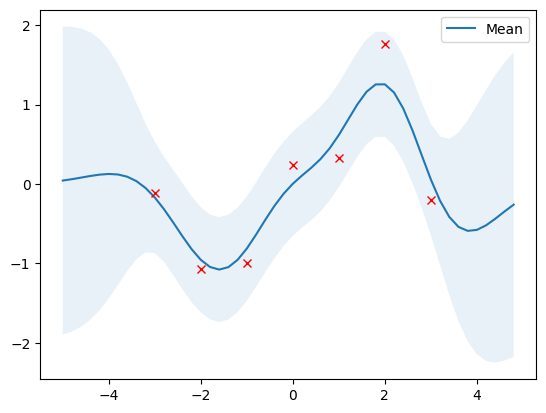

In [10]:
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_train, Y_train)
num_steps = 20
lr = 0.1
gpr.optim_jax(num_steps, lr, method='SGD')
print(gpr.l,gpr.sigma_f)
mu_s, cov_s = gpr.predict(X,return_cov=True)
gp.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)